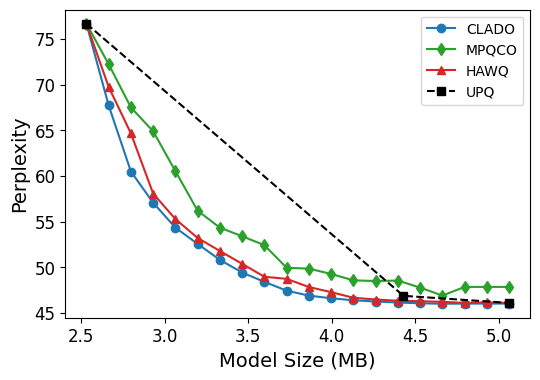

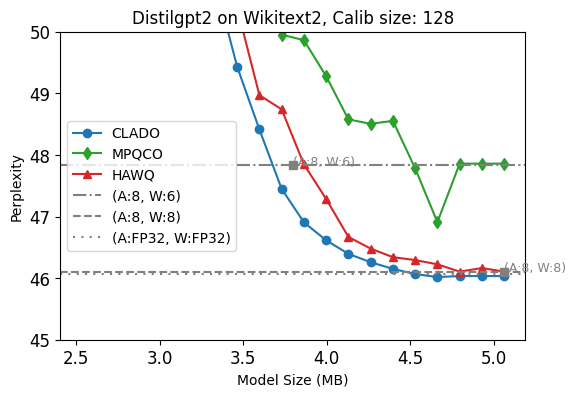

In [10]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import torch

out_dir = "./distilgpt2"

constraints_file = os.path.join(out_dir, "eval_constraints.pt")
size_bounds = torch.load(constraints_file)

n_runs = 1
n_constraints = len(size_bounds)

# n_runs x n_constraints 
clado_ppl = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_ppl = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_ppl = [[0 for _ in range(n_constraints)] for _ in range(n_runs)] 
hawq_ppl = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_x = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_x = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_x = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_x = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]


clado_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

for repeat in range(n_runs):

    #clado
    file_name = f'./distilgpt2/clado_a8_w8-6-4_eval_results.pt'
    res = torch.load(file_name)
    for j, item in enumerate(res):
        eval_res, size, bitops, dec = item
        clado_ppl[repeat][j] = eval_res['perplexity']
        clado_eval_loss[repeat][j] = eval_res['loss']
        clado_x[repeat][j] = size
        clado_dec[repeat][j] = dec

    #mpqco
    file_name = f'./distilgpt2/mpqco_a8_w8-6-4_eval_results.pt'
    res = torch.load(file_name)
    for j, item in enumerate(res):
        eval_res, size, bitops, dec = item
        mpqco_ppl[repeat][j] = eval_res['perplexity']
        mpqco_eval_loss[repeat][j] = eval_res['loss']
        mpqco_x[repeat][j] = size
        mpqco_dec[repeat][j] = dec

    #naive
    file_name = f'./distilgpt2/naive_a8_w8-6-4_eval_results.pt'
    res = torch.load(file_name)
    for j, item in enumerate(res):
        eval_res, size, bitops, dec = item
        naive_ppl[repeat][j] = eval_res['perplexity']
        naive_eval_loss[repeat][j] = eval_res['loss']
        naive_x[repeat][j] = size
        naive_dec[repeat][j] = dec
    
    #hawq
    file_name = f'./distilgpt2/hawq_a8_w8-6-4_eval_results.pt'
    res = torch.load(file_name)
    for j, item in enumerate(res):
        eval_res, size, bitops, dec = item
        hawq_ppl[repeat][j] = eval_res['perplexity']
        hawq_eval_loss[repeat][j] = eval_res['loss']
        hawq_x[repeat][j] = size
        hawq_dec[repeat][j] = dec
    

# default colors
# ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ppl_clado = np.array(clado_ppl)
ppl_naive = np.array(naive_ppl)
ppl_mpqco = np.array(mpqco_ppl)
ppl_hawq = np.array(hawq_ppl)

xs = size_bounds
y_clado =  np.mean(ppl_clado, axis=0)
y_naive =  np.mean(ppl_naive, axis=0)
y_mpqco =  np.mean(ppl_mpqco, axis=0)
y_hawq =  np.mean(ppl_hawq, axis=0)



plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
#plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')

x_UPQ = [2.53125, 4.4296875, 5.0625]
y_UPQ = [76.685791015625, 46.88258361816406, 46.10613250732422]
plt.plot(x_UPQ, y_UPQ, marker='s', color="black", label="UPQ", linestyle='--')


            
# A:8, W:7, head excluded: model size is: 4.4296875, {'loss': 3.8476462364196777, 'perplexity': 46.88258361816406}

            
# plt.plot([2.53125],[76.685791015625], color='gray', marker='s')
# plt.annotate("(A:8, W:4)", (2.53125, 76.685791015625), size=9, color='gray')
# plt.axhline(y=76.685791015625, color='gray', linestyle=':', label='(A:8, W:4)')
# # all layers: model size is: 4.8318328857421875, {'loss': 4.3616719245910645, 'perplexity': 78.3880844116211}
# # head excluded: model size is: 2.53125, {'loss': 4.33971643447876, 'perplexity': 76.685791015625}

# plt.plot([3.796875],[47.83370590209961], color='gray', marker='s')
# plt.annotate("(A:8, W:6)", (3.796875, 47.83370590209961), size=9, color='gray')
# plt.axhline(y=47.83370590209961, color='gray', linestyle='-.', label='(A:8, W:6)')
# # all layers: model size is: 7.247749328613281, {'loss': 3.877713918685913, 'perplexity': 48.31364059448242}
# # head excluded: model size is: 3.796875, {'loss': 3.8677306175231934, 'perplexity': 47.83370590209961}

# plt.plot([5.0625],[46.10613250732422], color='gray', marker='s')
# plt.annotate("(A:8, W:8)", (5.0625, 46.10613250732422), size=9, color='gray')
# plt.axhline(y=46.10613250732422, color='gray', linestyle='--', label='(A:8, W:8)')
# # all layers: model size is: 9.663665771484375 , {'loss': 3.8327829837799072, 'perplexity': 46.1909065246582}
# # head excluded: model size is: 5.0625, {'loss': 3.8309459686279297, 'perplexity': 46.10613250732422}

#plt.axhline(y=46.05925369262695, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics: {'loss': 3.8299286365509033, 'perplexity': 46.05925369262695}
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.title('Distilgpt2 on Wikitext2, Calib size: 128')
plt.ylabel('Perplexity', size=14)
plt.xlabel('Model Size (MB)', size=14)
plt.legend()
plt.savefig(f"distilgpt2.pdf", format="pdf", bbox_inches="tight")
#plt.ylim([45, 70])

plt.show()


#####################################zoomed#########################################
plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
#plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')


plt.plot([3.796875],[47.83370590209961], color='gray', marker='s')
plt.annotate("(A:8, W:6)", (3.796875, 47.83370590209961), size=9, color='gray')
plt.axhline(y=47.83370590209961, color='gray', linestyle='-.', label='(A:8, W:6)')
# all layers: model size is: 7.247749328613281, {'loss': 3.877713918685913, 'perplexity': 48.31364059448242}
# head excluded: model size is: 3.796875, {'loss': 3.8677306175231934, 'perplexity': 47.83370590209961}

plt.plot([5.0625],[46.10613250732422], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (5.0625, 46.10613250732422), size=9, color='gray')
plt.axhline(y=46.10613250732422, color='gray', linestyle='--', label='(A:8, W:8)')
# all layers: model size is: 9.663665771484375 , {'loss': 3.8327829837799072, 'perplexity': 46.1909065246582}
# head excluded: model size is: 5.0625, {'loss': 3.8309459686279297, 'perplexity': 46.10613250732422}

plt.axhline(y=46.05925369262695, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics: {'loss': 3.8299286365509033, 'perplexity': 46.05925369262695}

plt.title('Distilgpt2 on Wikitext2, Calib size: 128')
plt.ylabel('Perplexity')
plt.xlabel('Model Size (MB)')
plt.ylim([45, 50])
plt.legend()
plt.show()

# print(xs[3], xs[7], xs[11], xs[15])
# print(y_hawq[3], y_hawq[7], y_hawq[11], y_hawq[15])
# print(y_mpqco[3], y_mpqco[7], y_mpqco[11], y_mpqco[15])
# print(y_naive[3], y_naive[7], y_naive[11], y_naive[15])
# print(y_clado[3], y_clado[7], y_clado[11], y_clado[15])
